In [2]:
import os
import sys
from google.colab import drive

# ---------------------------------------------------------
# KONFIGURATION
# ---------------------------------------------------------
GITHUB_USER = "NickDerWerner"
REPO_NAME = "Personalizing-Text-to-Image-Diffusion-Models"
BRANCH = "Nick"  # Welchen Branch willst du nutzen?

# Pfad zu eurem Shared Google Drive Ordner (für Bilder & Models)
# WICHTIG: Das muss exakt stimmen!
DRIVE_PROJECT_PATH = '/content/drive/MyDrive/Neural_Networks'
# ---------------------------------------------------------

# 1. Google Drive mounten
drive.mount('/content/drive')

# 2. Public Repo klonen
repo_path = f"/content/{REPO_NAME}"

if not os.path.exists(repo_path):
    print(f"🔄 Klone Public Repository: {REPO_NAME}...")
    # Einfacher HTTPS Clone ohne Token
    !git clone -b {BRANCH} https://github.com/{GITHUB_USER}/{REPO_NAME}.git
else:
    print(f"🔄 Repository existiert bereits. Aktualisiere (git pull)...")
    %cd {repo_path}
    !git pull

# 3. Den Repo-Pfad zu Python hinzufügen
# Damit "from src.models import ..." funktioniert
if repo_path not in sys.path:
    sys.path.append(repo_path)
    print(f"✅ {repo_path} zum Python Path hinzugefügt.")

# 4. Requirements installieren
# Falls ihr eine requirements.txt habt (sehr empfohlen!)
if os.path.exists(f"{repo_path}/requirements.txt"):
    print("📦 Installiere Dependencies...")
    !pip install -r {repo_path}/requirements.txt -q
    print("✅ Dependencies installiert.")
else:
    print("⚠️ Keine requirements.txt gefunden.")

print("🚀 Setup fertig! Du kannst jetzt deine Module importieren.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔄 Repository existiert bereits. Aktualisiere (git pull)...
/content/Personalizing-Text-to-Image-Diffusion-Models
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 7 (delta 1), pack-reused 0 (from 0)
Unpacking objects: 100% (7/7), 3.08 KiB | 1.54 MiB/s, done.
From https://github.com/NickDerWerner/Personalizing-Text-to-Image-Diffusion-Models
 * [new branch]      Nick       -> origin/Nick
Already up to date.
📦 Installiere Dependencies...
✅ Dependencies installiert.
🚀 Setup fertig! Du kannst jetzt deine Module importieren.


In [1]:
!pip install diffusers transformers accelerate tqdm

In [8]:
import os

# 1. Navigate to the Repository Root Folder
# We CD into the main folder so Python understands where "src/" is
REPO_DIR = "/content/Personalizing-Text-to-Image-Diffusion-Models"
%cd {REPO_DIR}

# 2. Define your settings
MODEL_NAME = "runwayml/stable-diffusion-v1-5"
CLASS_PROMPT = "a dog"
NEGATIVE_PROMPT = "" # Add your negative prompt here

# Keeping this at 1 for the test.
# Remember to change this to ~200 for the actual training!
NUM_IMAGES = 1

# Path to Google Drive
OUTPUT_DIR = '/content/drive/MyDrive/Neural_Networks/Experiments/NickExperiments'

# Safety Check: Create the folder in Drive if it doesn't exist yet
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"🚀 Starting generation of {NUM_IMAGES} image(s)...")
print(f"📂 Saving to: {OUTPUT_DIR}")

# 3. Run the script
# Since we are in the Repo Root, we access the file via "src/filename.py"
!python src/generate_class_images.py \
  --model_id "{MODEL_NAME}" \
  --prompt "{CLASS_PROMPT}" \
  --negative_prompt "{NEGATIVE_PROMPT}" \
  --num_images {NUM_IMAGES} \
  --output_dir "{OUTPUT_DIR}"

/content/Personalizing-Text-to-Image-Diffusion-Models
🚀 Starting generation of 1 image(s)...
📂 Saving to: /content/drive/MyDrive/Neural_Networks/Experiments/NickExperiments
2025-11-26 12:38:55.450238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764160735.470364    7431 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764160735.476469    7431 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764160735.491655    7431 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764160735.491682    7431 computation_placer.cc:177] computation placer alrea

📂 Checking content of: /content/drive/MyDrive/Neural_Networks/Experiments/NickExperiments
📄 Found files: ['0000.png']
🖼️ Displaying: 0000.png


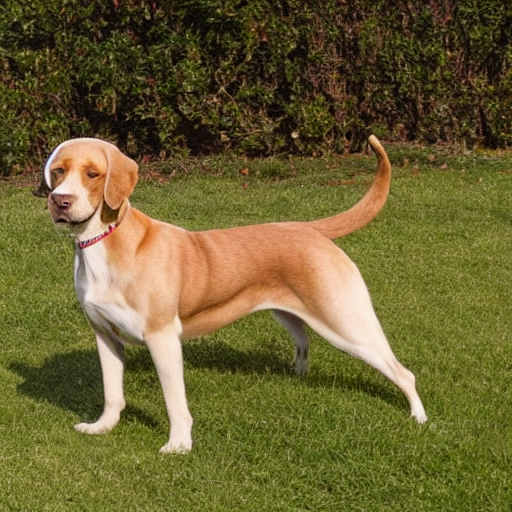

In [10]:
#Check if the image actually got created, by bypassing the google drive delay that takes up to 2 Minutes to sync


import os
from IPython.display import Image, display

# The path you defined earlier
OUTPUT_DIR = '/content/drive/MyDrive/Neural_Networks/Experiments/NickExperiments'

print(f"📂 Checking content of: {OUTPUT_DIR}")

# 1. List files in the folder
if os.path.exists(OUTPUT_DIR):
    files = os.listdir(OUTPUT_DIR)
    print(f"📄 Found files: {files}")

    if len(files) > 0:
        # 2. Display the first image found
        image_path = os.path.join(OUTPUT_DIR, files[0])
        print(f"🖼️ Displaying: {files[0]}")
        display(Image(filename=image_path, width=256))
    else:
        print("❌ Folder exists but is empty.")
else:
    print("❌ Folder path does not exist.")